#### Import these Packages to read in and slice the data.

In [60]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path =  '../data_calls/'
all_files = glob.glob(path + "*.csv")

calls = []

for filename in all_files:
    call_df = pd.read_csv(filename)
    calls.append(call_df)

calls_df = pd.concat(calls, axis=0, ignore_index=True)

In [3]:
path =  '../data_incidents/'
all_files = glob.glob(path + "*.csv")

incidents = []

for filename in all_files:
    in_df = pd.read_csv(filename)
    incidents.append(in_df)

incidents_df = pd.concat(incidents, axis=0, ignore_index=True)

In [50]:
calls_df.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Tencode Suffix', 'Tencode Suffix Description',
       'Disposition Code', 'Disposition Description', 'Block', 'Street Name',
       'Unit Dispatched', 'Sector', 'Zone', 'RPA', 'Latitude', 'Longitude',
       'Mapped Location', 'year', 'month'],
      dtype='object')

In [5]:
calls_df['Call Received'] = pd.to_datetime(calls_df['Call Received'])

In [7]:
calls_df['year'] = pd.DatetimeIndex(calls_df['Call Received']).year
calls_df['month'] = pd.DatetimeIndex(calls_df['Call Received']).month

In [8]:
month_list=[1,2,3,4,5]

In [9]:
calls_6months = calls_df[calls_df.month.isin(month_list)]

In [10]:
calls_6months.shape

(3613862, 21)

In [48]:
calls_6months.columns = calls_6months.columns.str.replace(' ','_')


In [49]:
calls_6months.columns = calls_6months.columns.str.lower()

In [57]:
calls_6months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613862 entries, 6480739 to 2237155
Data columns (total 21 columns):
event_number                  object
call_received                 datetime64[ns]
complaint_number              int64
shift                         object
tencode                       int64
tencode_description           object
tencode_suffix                object
tencode_suffix_description    object
disposition_code              int64
disposition_description       object
block                         float64
street_name                   object
unit_dispatched               object
sector                        object
zone                          object
rpa                           float64
latitude                      float64
longitude                     float64
mapped_location               object
year                          int64
month                         int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(11)
memory usage: 606.6+ MB


In [55]:
calls_6months.to_csv('../data/calls_5months.csv', index= False)

In [12]:
incidents_df['Incident Reported'] = pd.to_datetime(incidents_df['Incident Reported'], errors = 'ignore')

In [11]:
incidents_df['Incident Occurred'] = pd.to_datetime(incidents_df['Incident Occurred'])

In [14]:
incidents_df['occurred_year'] = pd.DatetimeIndex(incidents_df['Incident Occurred']).year

In [15]:
incidents_df['occurred_month'] = pd.DatetimeIndex(incidents_df['Incident Occurred']).month

# Working on Why 2020 is over double all the previous years.
## And the answer is : 2020 contains dates that are not just in 2020. Some of the earliest are I saw are 1994. I am not sure why this is occurring but just slicing to 

In [16]:
inci_20 = pd.read_csv('../data/Metro_Nashville_Police_Department_Incidents__2020_.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
inci_20.columns

Index(['Primary Key', 'Incident Number', 'Report Type',
       'Report Type Description', 'Incident Status Code',
       'Incident Status Description', 'Investigation Status',
       'Incident Occurred', 'Incident Reported', 'Incident Location', 'ZIP',
       'RPA', 'Zone', 'Location Code', 'Location Description',
       'Offense Number', 'Offense NIBRS', 'Offense Description',
       'Weapon Primary', 'Weapon Description', 'Victim Number',
       'Domestic Related', 'Victim Type', 'Victim Description',
       'Victim Gender', 'Victim Race', 'Victim Ethnicity',
       'Victim County Resident', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [18]:
inci_20['Incident Occurred'] = pd.to_datetime(inci_20['Incident Occurred'])


In [19]:
inci_20['Incident Reported'] = pd.to_datetime(inci_20['Incident Reported'])


In [20]:
inci_20['occurred_year'] = pd.DatetimeIndex(inci_20['Incident Occurred']).year


In [21]:
inci_20['occurred_month'] = pd.DatetimeIndex(inci_20['Incident Occurred']).month

In [22]:
inci_20 = inci_20[inci_20.occurred_year==2020]

In [23]:
inci_20.shape

(48171, 33)

In [24]:
incidents_df.shape

(855349, 33)

In [26]:
incidents_all = incidents_df.append(inci_20,ignore_index = True)

In [31]:
incidents_all = incidents_all[incidents_all.occurred_month.isin(month_list)]

In [38]:
incidents_all.columns = incidents_all.columns.str.replace(' ', '_')

In [39]:
incidents_all.columns = incidents_all.columns.str.lower()

In [56]:
incidents_all.to_csv('../data/incidents_5months.csv',index=False)

In [37]:
incidents_all.groupby('occurred_month')['occurred_year'].value_counts()

occurred_month  occurred_year
1               2018             10484
                2017             10458
                2020              9847
                2013              9815
                2019              9798
                2016              9664
                2015              9512
                2014              9317
2               2018              9532
                2020              9390
                2016              9382
                2017              8902
                2013              8387
                2019              8374
                2014              8343
                2015              7983
3               2016             10836
                2018             10301
                2015             10110
                2017             10050
                2014              9736
                2013              9538
                2019              9401
                2020              9268
4               2016             1

In [36]:
incidents_all.groupby('occurred_year')['occurred_month'].value_counts()

occurred_year  occurred_month
2013           5                 10329
               4                 10072
               1                  9815
               3                  9538
               2                  8387
2014           5                 11008
               4                 10286
               3                  9736
               1                  9317
               2                  8343
2015           5                 11057
               4                 10281
               3                 10110
               1                  9512
               2                  7983
2016           3                 10836
               4                 10741
               5                 10629
               1                  9664
               2                  9382
2017           5                 11134
               1                 10458
               4                 10439
               3                 10050
               2                  

In [43]:
facet_df_incidents = incidents_all.groupby('occurred_month')['occurred_year'].value_counts().to_frame()

In [45]:
facet_df_incidents.columns =['incidents_counts']

In [46]:
facet_df_incidents=facet_df_incidents.reset_index()

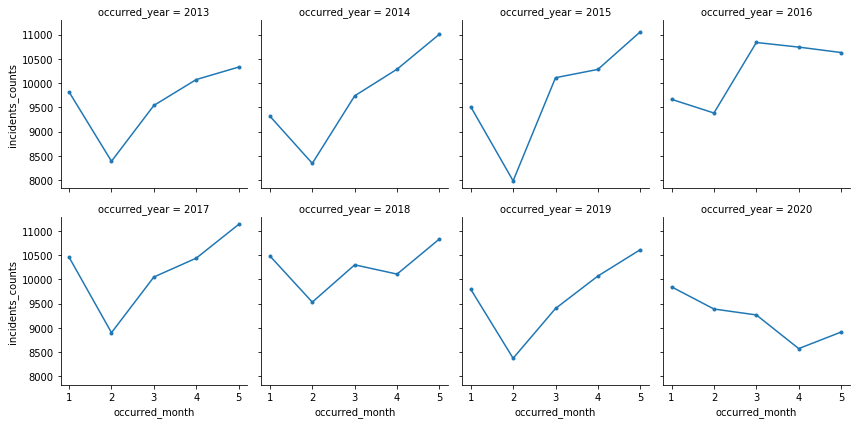

In [66]:
#att = sns.load_dataset("attention")
#>>> g = sns.FacetGrid(att, col="subject", col_wrap=5, height=1.5)
#>>> g = g.map(plt.plot, "solutions", "score", marker=".")
facet_df_incidents
g = sns.FacetGrid(facet_df_incidents, col='occurred_year', col_wrap =4)
g = g.map(plt.plot,'occurred_month','incidents_counts', marker='.')

The above FacetGrid shows January and February with a relative drop in crime and an uptick starting in March and steadily increasing as with a cap in May with an exception in 2016. As we look above the incidents for 2020 start in the normal range and proceed to drop once the stay at home order goes live in April. With the Outbreak of Covid-19 getting more coverage in the media, a question of people staying home even before the Order was announced could be made.